#Assignment 3


L'obiettivo del assignment è di creare e addestrare una CNN. Essa deve essere costruita con l'obbiettivo di raggiungere l'accuracy massima possibile sul test set con il vincolo di utilizzare massimo 6K parametri.


Eseguito da: Artemisia Sarteschi 829677

## Librerie utilizzate

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

Importo il dataset che verranno utilizzati per la definizione della CNN

In [2]:
num_classes = 10
input_shape = (28, 28, 1)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Porto le immagini nel range [0,1] e nelle dimensioni 28x28

In [3]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("x_train shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_train shape: (10000, 28, 28, 1)


Effettuo il one hot encode portando il vettore delle etichette associate alle immagini in etichette categoriche (ovvero una matrice binaria delle classi). 

In [5]:
print("y_train shape:", y_train.shape)
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print("y_train shape:", y_train.shape)

y_train shape: (60000,)
y_train shape: (60000, 10)


Divido il train in un aprte per i solo train e una parte per la validation

In [6]:
x_train, X_val, y_train, Y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=7 )

Creo il modello con il vincolo di rimanere all'interno dei 6000 parametri, inoltre:



*   Il kernel_size è scelto simmetrico quindi quadrato 
*   La funzione di attivazione scelta è relu
*   Per entrambi i convolution layer vi è un MaxPooling Layer di dimensione (2, 2)
*   I filter applicati sono 8 nel caso del primo layer e 16 nel caso del secondo

In [7]:
model = keras.Sequential(
    [keras.Input(shape=input_shape),
     layers.Conv2D(filters = 8, kernel_size=(3, 3), activation = "relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Conv2D(filters = 16, kernel_size=(3, 3), activation = "relu"),
     layers.MaxPooling2D(pool_size=(2, 2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation = "softmax")
    ]
)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dropout (Dropout)           (None, 400)               0

La loss del modello viene calcolata con la "categorical_crossentropy" in quanto sono presenti varie categorie.
Il numero di epoche è tenuto basso in quanto vengono trovati dei valori motlo buoni sia di accuracy che di loss sin dalle prime epoche.

In [9]:
batch_size = 128 
n_epochs = 20

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])
model_history = model.fit(x_train, y_train, batch_size = batch_size, epochs = n_epochs, validation_data = (X_val, Y_val))

Epoch 1/20
422/422 [==============================] - 5s 7ms/step - loss: 0.7005 - accuracy: 0.7775 - val_loss: 0.1954 - val_accuracy: 0.9453
Epoch 2/20
422/422 [==============================] - 3s 6ms/step - loss: 0.2344 - accuracy: 0.9302 - val_loss: 0.1290 - val_accuracy: 0.9645
Epoch 3/20
422/422 [==============================] - 3s 6ms/step - loss: 0.1780 - accuracy: 0.9465 - val_loss: 0.1000 - val_accuracy: 0.9715
Epoch 4/20
422/422 [==============================] - 3s 7ms/step - loss: 0.1518 - accuracy: 0.9544 - val_loss: 0.0848 - val_accuracy: 0.9768
Epoch 5/20
422/422 [==============================] - 3s 6ms/step - loss: 0.1373 - accuracy: 0.9586 - val_loss: 0.0757 - val_accuracy: 0.9790
Epoch 6/20
422/422 [==============================] - 3s 7ms/step - loss: 0.1269 - accuracy: 0.9612 - val_loss: 0.0667 - val_accuracy: 0.9810
Epoch 7/20
422/422 [==============================] - 3s 7ms/step - loss: 0.1196 - accuracy: 0.9635 - val_loss: 0.0656 - val_accuracy: 0.9810
Epoch 

Di seguito viene visualizzato il grafico della loss e dell'accuracy del modello durante il training e la validation, da cui si può visualizzare come il modello abbia una buona performance su dati non osservati (validation)

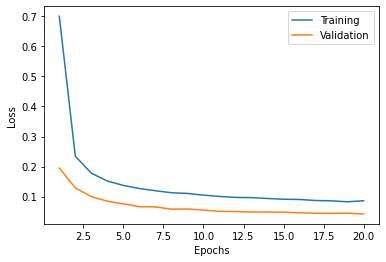

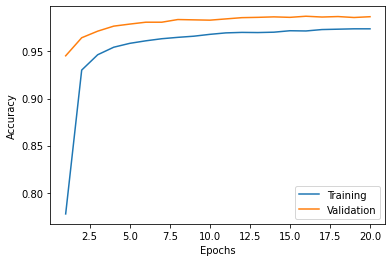

In [10]:
x_plot = list(range(1,n_epochs+1))

def plot_history(model_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, model_history.history['loss'])
    plt.plot(x_plot, model_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, model_history.history['accuracy'])
    plt.plot(x_plot, model_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()


plot_history(model_history)

classification performance on training, validation (if used) and test set

Di seguito le performance sul train set, validation set e test set in termini di accuracy e loss, possiamo vedere che tutti i risultati ottenuti hanno un alta accuracy e una loss bassa. Questo è indice di una buona performance dal momento che sui dati non osservati questa performance è mantenuta.

In [11]:
score_train = model.evaluate(x_train, y_train, verbose=0, batch_size=128)
print("Train loss:", score_train[0])
print("Train accuracy:", score_train[1])

Train loss: 0.03647614270448685
Train accuracy: 0.9888888597488403


In [12]:
score_val = model.evaluate(X_val, Y_val, verbose=0, batch_size=128)
print("Validation loss:", score_val[0])
print("Validation accuracy:", score_val[1])

Validation loss: 0.042336903512477875
Validation accuracy: 0.9868333339691162


In [13]:
score_test = model.evaluate(x_test, y_test, verbose=0, batch_size=128)
print("Test loss:", score_test[0])
print("Test accuracy:", score_test[1])

Test loss: 0.038113661110401154
Test accuracy: 0.988099992275238


Di seguito vengono invece comparate le metriche di precision, recall e f1-score per train set, validation set e test set

In [14]:
prediction_train = model.predict(x_train)

y_classes_train = prediction_train.argmax(axis=-1)

y_train = y_train.argmax(axis=-1)

print(classification_report(y_classes_train,y_train))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5388
           1       0.99      0.99      0.99      6072
           2       0.99      0.99      0.99      5398
           3       0.99      0.99      0.99      5446
           4       0.99      0.99      0.99      5210
           5       0.99      0.99      0.99      4853
           6       0.99      0.99      0.99      5293
           7       0.99      0.98      0.99      5687
           8       0.98      0.99      0.99      5269
           9       0.98      0.98      0.98      5384

    accuracy                           0.99     54000
   macro avg       0.99      0.99      0.99     54000
weighted avg       0.99      0.99      0.99     54000



In [15]:
prediction_val = model.predict(X_val)

y_classes_val = prediction_val.argmax(axis=-1)

Y_val = Y_val.argmax(axis=-1)

print(classification_report(y_classes_val,Y_val))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       554
           1       0.99      0.99      0.99       665
           2       0.99      0.98      0.99       578
           3       0.99      0.99      0.99       680
           4       0.98      0.98      0.98       596
           5       0.99      0.99      0.99       563
           6       1.00      0.99      0.99       639
           7       0.99      0.98      0.98       625
           8       0.98      0.99      0.98       555
           9       0.96      0.97      0.97       545

    accuracy                           0.99      6000
   macro avg       0.99      0.99      0.99      6000
weighted avg       0.99      0.99      0.99      6000



In [16]:
prediction_test = model.predict(x_test)

y_classes_test = prediction_test.argmax(axis=-1)

y_test = y_test.argmax(axis=-1)

print(classification_report(y_classes_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       987
           1       1.00      0.99      0.99      1137
           2       0.99      0.98      0.99      1038
           3       0.99      0.99      0.99      1015
           4       0.99      0.99      0.99       978
           5       0.99      0.99      0.99       893
           6       0.99      0.99      0.99       952
           7       0.98      0.98      0.98      1026
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1000

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



Possiamo quindi concludere che la rete riesce a raggiungere il livello di accuracy sul test set e performi bene anche su train set e validation set.